In [2]:
#--------------------------------------主成分分析--------------------------------------------
###数据标准化
import pandas as pd
df_wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine//wine.data', header=None)、


In [3]:
from sklearn.cross_validation import  train_test_split
from sklearn.preprocessing import StandardScaler
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7)
sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [4]:
#构建协方差矩阵,获取协方差矩阵的特征值和特征向量
import numpy as np
cov_mat = np.cov(X_train_std.T)     #cov函数，标准化处理的训练数据集的协方差矩阵
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)   #linalg.eig函数，通过特征分析，得到13个特征值的向量及其对应的特征值
print('\nEigenbalues \n%s' % eigen_vals)


Eigenbalues 
[ 4.65526557  2.60443872  1.46313533  0.98975935  0.8622848   0.62321901
  0.55651025  0.37692715  0.0945305   0.27115433  0.24187113  0.16831627
  0.19827866]


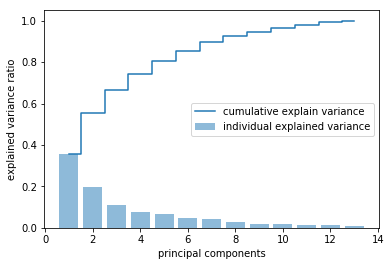

In [30]:

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid', label='cumulative explain variance')
plt.ylabel('explained variance ratio')
plt.xlabel('principal components')
plt.legend(loc='best')
plt.show()

In [39]:
###集中的信息转换到新的主成分轴上
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

# Note: I added the `key=lambda k: k[0]` in the sort call above
# just like I used it further below in the LDA section.
# This is to avoid problems if there are ties in the eigenvalue
# arrays (i.e., the sorting algorithm will only regard the
# first element of the tuples, now).

In [40]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[ 4.65526557  2.60443872]
 [ 4.65526557  2.60443872]
 [ 4.65526557  2.60443872]
 [ 4.65526557  2.60443872]
 [ 4.65526557  2.60443872]
 [ 4.65526557  2.60443872]
 [ 4.65526557  2.60443872]
 [ 4.65526557  2.60443872]
 [ 4.65526557  2.60443872]
 [ 4.65526557  2.60443872]
 [ 4.65526557  2.60443872]
 [ 4.65526557  2.60443872]
 [ 4.65526557  2.60443872]]


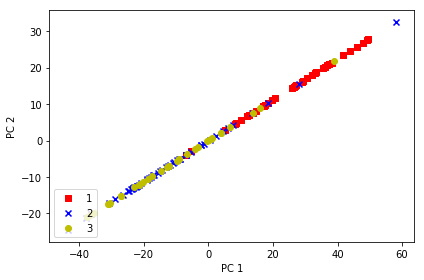

In [34]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'y']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca2.png', dpi=300)
plt.show()